IMPORTARE IL ***DATABASE***

In [8]:
import pandas as pd

df = pd.read_csv("owid-covid-data.csv")

(df.head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


VERIFICA DELLE DIMENSIONI DEL ***DATASET*** E DEI RELATIVI METADATI

In [9]:
#Dimensioni del dataset
import pandas as pd

df = pd.read_csv("owid-covid-data.csv")

print("dimensioni del dataset:", df.shape)

dimensioni del dataset: (429435, 67)


In [10]:
#Metadati (colonne)
("nomi delle colonne:", df.columns)

('nomi delle colonne:',
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
        'new_cases_smoothed', 'total_deaths', 'new_deaths',
        'new_deaths_smoothed', 'total_cases_per_million',
        'new_cases_per_million', 'new_cases_smoothed_per_million',
        'total_deaths_per_million', 'new_deaths_per_million',
        'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
        'icu_patients_per_million', 'hosp_patients',
        'hosp_patients_per_million', 'weekly_icu_admissions',
        'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
        'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
        'total_tests_per_thousand', 'new_tests_per_thousand',
        'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
        'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
        'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
        'new_vaccinations',

In [11]:
#Somma dei casi totali da inizio pandemia
casi_totali = df["total_cases"].sum()
print("numero totale di casi COVID-19:", casi_totali)

numero totale di casi COVID-19: 3033056852746.0


In [12]:
#Al fine di trovare la percentuale mondiale

#Calcolo della percentuale

print(f"Il numero in percentuale è: {3033056852746.0:.2%}")

Il numero in percentuale è: 303305685274600.00%


ANDAMENTO DATI 2022, **ITALIA**

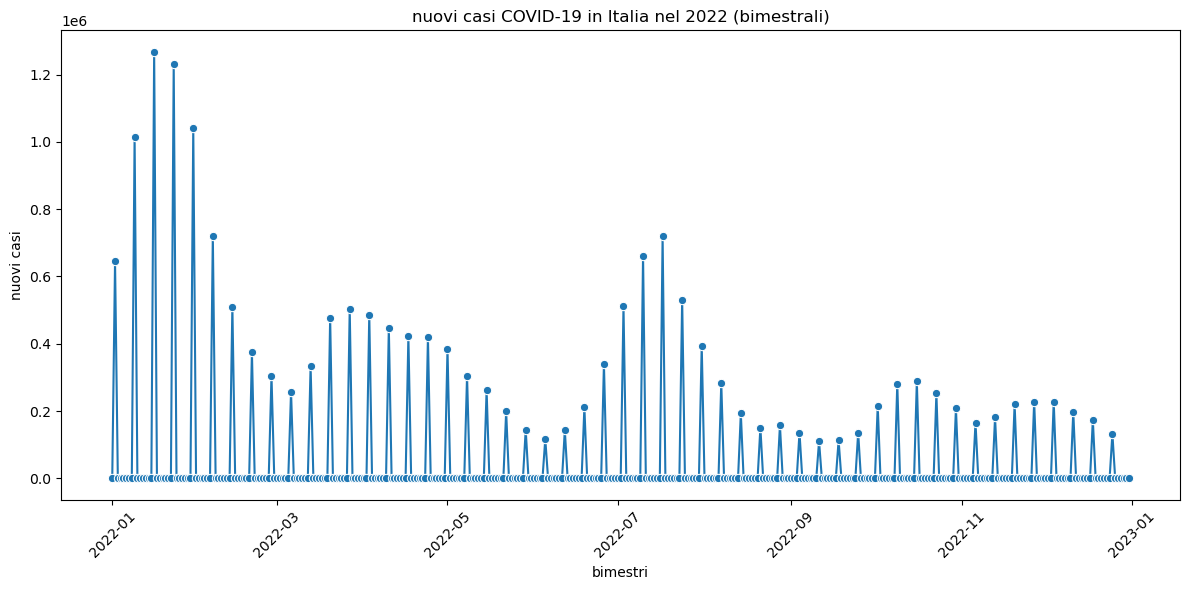

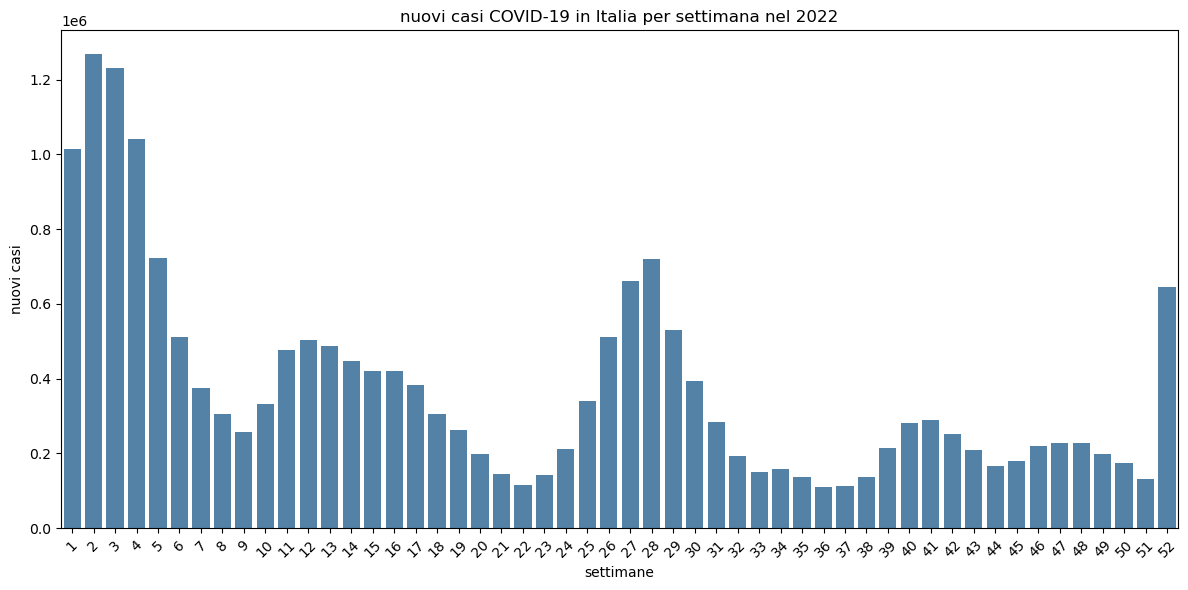

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Conversione delle date della colonna: DATETIME
df['date'] = pd.to_datetime(df['date'])
#Filtraggio dati italiani
df_Italia = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]
#Pulizia giorni senza misurazione
df_Italia_validi = df_italy.dropna(subset=['new_cases'])
#Grafico a linee per l'andamento giornaliero 
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', data=df_Italia_validi, marker='o')
plt.title("nuovi casi COVID-19 in Italia nel 2022 (bimestrali)")
plt.xlabel("bimestri")
plt.ylabel("nuovi casi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Grafico a barre per l'aggregazione settimanale dei nuovi casi
df_Italia_validi['week'] = df_Italia_validi['date'].dt.isocalendar().week
#Somma nuovi casi
settimanali = df_Italia_validi.groupby('week')['new_cases'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='week', y='new_cases', data=settimanali, color='steelblue')
plt.title("nuovi casi COVID-19 in Italia per settimana nel 2022")
plt.xlabel("settimane")
plt.ylabel("nuovi casi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**ITALIA**, GERMANIA & FRANCIA

C:\Users\Hp\AppData\Local\Temp\ipykernel_1828\3194725392.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='icu_patients', data=df_filtrato, palette='Set2')


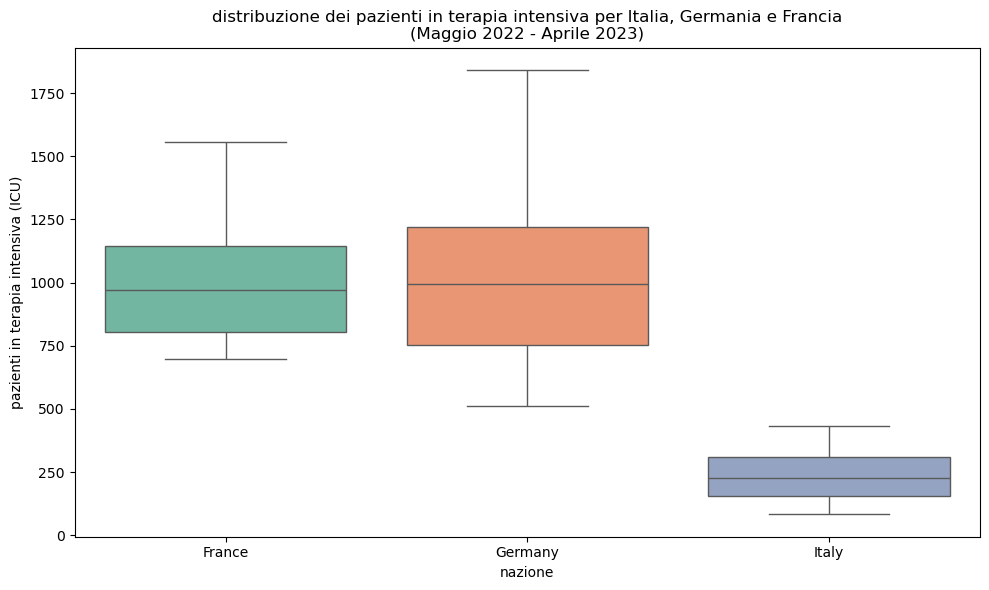

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Conversione delle date della colonna: DATETIME
df['date'] = pd.to_datetime(df['date'])
#Filtraggio dati per le tre nazioni
mask = (df['location'].isin(['Italy', 'Germany', 'France'])) & \
       (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30')
df_filtrato = df[mask]
#Rimozione righe prive di misurazione
df_filtrato = df_filtrato.dropna(subset=['icu_patients'])
#Boxplot sulla terapia intensiva
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=df_filtrato, palette='Set2')
plt.title("distribuzione dei pazienti in terapia intensiva per Italia, Germania e Francia\n(Maggio 2022 - Aprile 2023)")
plt.xlabel("nazione")
plt.ylabel("pazienti in terapia intensiva (ICU)")
plt.tight_layout()
plt.show()

Il boxplot evidenzia differenze sostanziali nella distribuzione dei pazienti in terapia intensiva tra Italia, Germania e Francia, suggerendo che l'impatto del COVID-19 e le strategie di risposta sanitaria variano notevolmente tra questi paesi nel periodo analizzato.

ANALISI SUGLI **OSPEDALIZZATI** DEL **2021**: ITALIA, GERMANIA, FRANCIA & SPAGNA

numero di valori nulli in 'hosp_patients': 365


C:\Users\Hp\AppData\Local\Temp\ipykernel_1828\950704728.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='hosp_patients_filled', data=agg_sum, palette='Set1')


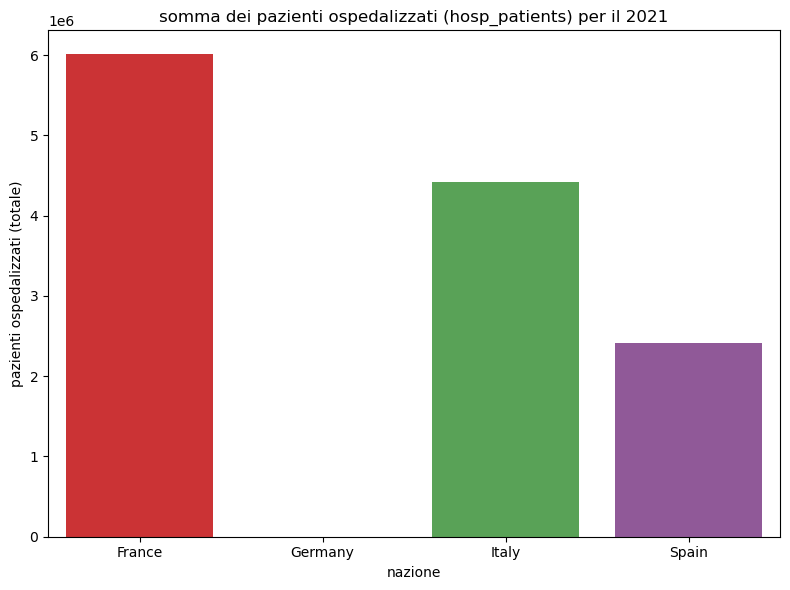

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Conversione delle date della colonna: DATATIME
df['date'] = pd.to_datetime(df['date'])
#Filtraggio dati per tutte le nazioni prese in considerazione
mask = (df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (df['date'].dt.year == 2021)
df_filtrato = df[mask].copy()
#Verifica valori nulli hosp_patients
valori_nulli = df_filtrato['hosp_patients'].isnull().sum()
print("numero di valori nulli in 'hosp_patients':", valori_nulli)
#Come gestire i dati nulli.
#Il valore mancante si decide indichi l'assenza d'ospedalizzaizone
df_filtrato['hosp_patients_filled'] = df_filtrato['hosp_patients'].fillna(0)
#Raggruppamento e somma casi ospedalizzati
agg_sum = df_filtrato.groupby('location')['hosp_patients_filled'].sum().reset_index()
#Esposizione grafica tramite barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='location', y='hosp_patients_filled', data=agg_sum, palette='Set1')
plt.title("somma dei pazienti ospedalizzati (hosp_patients) per il 2021")
plt.xlabel("nazione")
plt.ylabel("pazienti ospedalizzati (totale)")
plt.tight_layout()
plt.show()

Se i valori nulli in hosp_patients rappresentano l'assenza di segnalazioni (quindi, nessun paziente ospedalizzato), sostituirli con 0 è una scelta ragionevole. Tuttavia, se il NaN indica dati mancanti dovuti a errori di raccolta o imprecisioni, la sostituzione potrebbe distorcere l’analisi e sarebbe opportuno indagare la causa o utilizzare metodi di imputazione più sofisticati.